# **Approximation Algorithms**

**Makespan defines the total time required to finish all the tasks, a.k.a. the maximum of time required per processor.**

![](2023-11-05-14-51-19.png)

### The Greedy Solution

![](2023-11-05-15-03-01.png)

![](2023-11-05-15-04-45.png)

![](2023-11-05-15-06-30.png)

![](2023-11-05-15-14-19.png)

### Alternative Method:

![](2023-11-05-15-16-08.png)

![](2023-11-05-15-17-05.png)

## **Vertex Cover**

![](2023-11-05-21-24-55.png)

![](2023-11-05-21-31-39.png)

![](2023-11-05-21-45-19.png)

![](2023-11-05-21-48-50.png)

![](2023-11-05-21-53-36.png)

![](2023-11-05-21-54-49.png)

![](2023-11-05-21-56-10.png)

![](2023-11-05-22-00-27.png)

### **Alternative Greedy Algorithm:**

![](2023-11-05-22-02-01.png)

![](2023-11-05-22-02-30.png)

![](2023-11-05-22-02-57.png)

![](2023-11-05-22-04-39.png)

![](2023-11-05-22-05-05.png)

![](2023-11-05-22-05-31.png)

![](2023-11-05-22-05-50.png)

![](2023-11-05-22-11-53.png)

## **Maximum Satisfiability Problem**

![](2023-11-06-06-50-36.png)

![](2023-11-06-07-17-46.png)

# **01. MAX-SAT Problem**

In [2]:
# We will represent clause as a list of literals, 
# A -ve sign in front of the literal means that the 
# corresponding variable is negated.
# Eg., (x2 or not x4 or x5) --> [2, -4, 5]
# IMPORTANT: we assume clauses are not empty and a variable cannot appear twice in the same clause.

# given a list of clauses and a truth assignment as a list of true/false, return number of clauses satisfied
def num_clauses_satisfied(lst_of_clauses, truth_assign):   
    # truth_assign is simply a list of booleans. 
    # The truth assignment for variable # i is given by truth_assign[i-1]
    n = len(truth_assign)
    m = len(lst_of_clauses)
    num_satisfied = 0
    for clause in lst_of_clauses:
        is_clause_satisfied = any([truth_assign[j-1] if j > 0 else not truth_assign[-j-1] for j in clause])
        num_satisfied += 1 if is_clause_satisfied else 0
    return num_satisfied

# Given a list of clauses, calculate the expectation
# Assume that the same variable does not repeat in a given clause.
# This calculation will be incorrect if this assumption does not hold
def expectation(lst_of_clauses):
    expect = 0
    for clause in lst_of_clauses: # go through the clauses
        expect += 1.0 - 1.0/(2.0**len(clause)) # add to the expectation based on the probability clause is true.
    return expect

# Assign and Simplify the clause by assigning variable var to boolean value val
def assign_and_simplify(lst_of_clauses, var, val):
    new_list_of_clauses = []
    num_satisfied = 0 # counter for number of clauses we satisfy due to this assignment
    num_falsified = 0 # counter for number of clauses we falsify due to this assignment
    for clause in lst_of_clauses: # go through each clause
        var_in_clause = var in clause # is the variable `var` part of our clause
        neg_var_in_clause = (-var) in clause #is the literate not (var) part of our clause
        if (var_in_clause and val) or (neg_var_in_clause and not val):
                # entire clause is true
                num_satisfied += 1
        elif (var_in_clause and not val) or (neg_var_in_clause and val):
                # remove var from clause 
                new_clause = [j for j in clause if (j != var and j != -var)]
                if len(new_clause) == 0: # did the clause become empty as a result?
                    num_falsified += 1
                else:
                    new_list_of_clauses.append(new_clause) # append new clause
        else:
            new_list_of_clauses.append(clause)
    
    assert len(lst_of_clauses) ==len(new_list_of_clauses) + num_satisfied + num_falsified 
    return (num_satisfied, num_falsified, new_list_of_clauses)

def approx_max_sat(n, lst_of_clauses):
    # make sure that the clauses hae literals -i or i for i in range 1 to n inclusive
    assert all( all( 1 <= lj <= n or -n <= lj <= -1 for lj in clause) for clause in lst_of_clauses)
    clauses = lst_of_clauses
    assign = []
    num_sat = 0
    num_fals = 0
    for i in range(1, n+1): # go through each variable 
        (n1, f1, phi1) = assign_and_simplify(clauses, i, True) # create formula by assigning xi -> True
        (n2, f2, phi2) = assign_and_simplify(clauses, i, False)# xi -> False
        e1 = expectation(phi1) + n1  # calculate expectations but also account for number of satisfied clauses
        e2 = expectation(phi2) + n2
        if (e1 >= e2): 
            assign.append(True) # assign xi to true
            num_sat += n1
            num_fals += f1
            clauses = phi1 # replace the formula with phi1
        else:
            assign.append(False) # assign xi to false
            num_sat += n2
            num_fals += f2
            clauses = phi2 # replace the forumula with phi2
    return (assign, num_sat)
            
## TEST
n = 9
lst_of_clauses = [
    [1, 4, -7],
    [-1, -3, -8],
    [2, 5, -7],
    [-2, -6, -9],
    [1, -4, -7],
    [-1, 4, 5],
    [4, 6, 9],
    [-7, -8, 9],
    [8, 9],
    [-9],
    [-8],
    [-6]
]
assign, num_clauses = approx_max_sat(n, lst_of_clauses)
print(f'Found assignment satisfying {num_clauses} clauses.')
for i in range(n):
    print(f'x_{i+1} --> {assign[i]}')

#print(num_clauses_satisfied(lst_of_clauses, assign))    

Found assignment satisfying 11 clauses.
x_1 --> True
x_2 --> True
x_3 --> False
x_4 --> True
x_5 --> True
x_6 --> False
x_7 --> False
x_8 --> False
x_9 --> True


# **02. Job Scheduling Problem**

![](2023-11-18-07-22-29.png)

In [3]:
from pulp import *

def formulate_min_makespan(task_times, m):
    n = len(task_times)
    assert m < n
    prob = LpProblem('min-makespan', LpMinimize)
    # create a list of list of indicator variables w_i_j
    indicator_vars = [ [LpVariable(f'w_{i}_{j}', cat='Binary') for j in range(m)] for i in range(n) ]
    M = LpVariable('M', cat='Continuous') # create a variable M for makespan -- it is real-valued
    # set objective
    prob += M
    # add constraints
    # each task must be assigned to exactly one processor
    for i in range(n): # for each task
        prob += lpSum(indicator_vars[i]) == 1
    # working time for each processor must be less than the makespan
    for j in range(m):
        vars_i = [indicator_vars[i][j] for i in range(n)]
        prob += lpDot(task_times, vars_i) <= M # lpDot is a very useful function that pulp supports to take dot product of two lists
    # solve and extract answer
    prob.solve()
    assert prob.status == constants.LpStatusOptimal
    # extract the job assignment
    A = []
    for i in range(n):
        w_list = indicator_vars[i]
        ## TODO: Replace code below using a suitable python list API function
        assigned_proc = None
        for j in range(m):
            if w_list[j].varValue > 0:
                assigned_proc = j
                break
        assert assigned_proc != None, f'Task # {i} did not get assigned to any processor. There is a bug in problem formulation'
        A.append(assigned_proc)
    return (A, M.varValue)

(A, mkSpan) = formulate_min_makespan([2,1,4,2,1], 2)
print('Assignment')
print('----------------------')
for i in range(5):
    print(f'Task # {i+1} assigned to processor # {A[i]+1}')
print(f'MakeSpan is {mkSpan}')    

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/70/jz6cvvk97t30vggrppkktlzh0000gn/T/498dbd8fd73e40e3aebe2515e3652676-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/70/jz6cvvk97t30vggrppkktlzh0000gn/T/498dbd8fd73e40e3aebe2515e3652676-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 56 RHS
At line 64 BOUNDS
At line 76 ENDATA
Problem MODEL has 7 rows, 11 columns and 22 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 5 - 0.00 seconds
Cgl0004I processed model has 2 rows, 4 columns (3 integer (1 of which binary)) and 8 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 5
Cbc0038I Relaxing c

![](2023-11-18-07-34-22.png)

In [4]:
def greedy_jobshop_scheduling(timings, m):
    n = len(timings)
    A = []
    K = [(0,j) for j in range(m)] # for simplicity of coding maintain K as a array of tuples consisting of timing and processor index
    for i in range(n):
        print(f'K = {K}')
        (min_proc_timing, min_proc_idx) = min(K) # this can be improvedd using a priority queue but right now this will take O(m) time
        A.append(min_proc_idx) 
        print(f'Task {i} assigned to processor {min_proc_idx}')
        K[min_proc_idx] = (min_proc_timing + timings[i], min_proc_idx) # update the array K
    print(f'K = {K}')
    makeSpan, max_proc_idx = max(K)
    print(f'Make span = {makeSpan}')
    return A

A = greedy_jobshop_scheduling([2,1,4,2,1], 2)

K = [(0, 0), (0, 1)]
Task 0 assigned to processor 0
K = [(2, 0), (0, 1)]
Task 1 assigned to processor 1
K = [(2, 0), (1, 1)]
Task 2 assigned to processor 1
K = [(2, 0), (5, 1)]
Task 3 assigned to processor 0
K = [(4, 0), (5, 1)]
Task 4 assigned to processor 0
K = [(5, 0), (5, 1)]
Make span = 5


![](2023-11-18-07-35-24.png)

In [5]:
def greedy_jobshop_scheduling_sorted(T, m):
    # First sort the array T provided but as we do so remember the indices in the old array
    # When we refer to Task # i, we are refering to its index in the array T.
    timings = [(ti, j) for (j, ti) in enumerate(T)] # Store each task and index
    timings.sort(reverse=True) # Sort it in reverse order
    n = len(timings)
    A = [-1] * n # Initialize the assignment to -1 (dummy value)
    K = [(0,j) for j in range(m)] # for simplicity of coding maintain K as a array of tuples consisting of timing and processor index
    for (ti, ti_idx) in timings: # iterate through the array of times and indices into original array
        print(f'K = {K}')
        (min_proc_timing, min_proc_idx) = min(K) # this can be improved using a priority queue but right now this will take O(m) time
        A[ti_idx]= min_proc_idx # Assign the task ti_idx to processor min_proc_idx with minimum load so far.
        print(f'Task {ti_idx} assigned to processor {min_proc_idx}') 
        K[min_proc_idx] = (min_proc_timing + ti, min_proc_idx) # update the array K
    print(f'K = {K}')
    makeSpan, max_proc_idx = max(K)
    print(f'Make span = {makeSpan}')
    return A

A = greedy_jobshop_scheduling_sorted([1,1,1,1,1,1,1,1,1,1,1,1,1,1,5], 4)

K = [(0, 0), (0, 1), (0, 2), (0, 3)]
Task 14 assigned to processor 0
K = [(5, 0), (0, 1), (0, 2), (0, 3)]
Task 13 assigned to processor 1
K = [(5, 0), (1, 1), (0, 2), (0, 3)]
Task 12 assigned to processor 2
K = [(5, 0), (1, 1), (1, 2), (0, 3)]
Task 11 assigned to processor 3
K = [(5, 0), (1, 1), (1, 2), (1, 3)]
Task 10 assigned to processor 1
K = [(5, 0), (2, 1), (1, 2), (1, 3)]
Task 9 assigned to processor 2
K = [(5, 0), (2, 1), (2, 2), (1, 3)]
Task 8 assigned to processor 3
K = [(5, 0), (2, 1), (2, 2), (2, 3)]
Task 7 assigned to processor 1
K = [(5, 0), (3, 1), (2, 2), (2, 3)]
Task 6 assigned to processor 2
K = [(5, 0), (3, 1), (3, 2), (2, 3)]
Task 5 assigned to processor 3
K = [(5, 0), (3, 1), (3, 2), (3, 3)]
Task 4 assigned to processor 1
K = [(5, 0), (4, 1), (3, 2), (3, 3)]
Task 3 assigned to processor 2
K = [(5, 0), (4, 1), (4, 2), (3, 3)]
Task 2 assigned to processor 3
K = [(5, 0), (4, 1), (4, 2), (4, 3)]
Task 1 assigned to processor 1
K = [(5, 0), (5, 1), (4, 2), (4, 3)]
Task 0

# **03. Vertex Cover Problem**

![](2023-11-18-07-40-54.png)

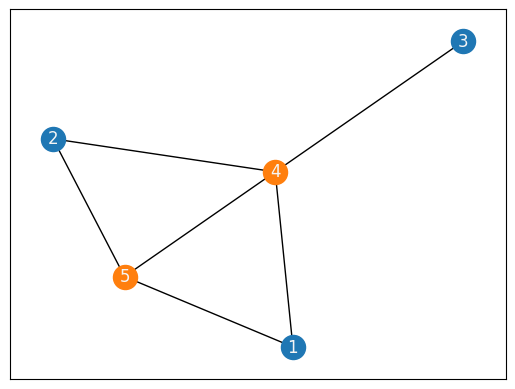

In [7]:
import networkx as nx
from matplotlib import pyplot as plt
from pylab import rcParams

# Use matplotlib and networkx to plot graphs with a designated
# vertex cover passed in as a list of vertices.
# n: number of vertices
# edge_list: list of edges. please ensure that if edge (i,j) 
#            is present then (j,i) is not. We will not be checking this.
# vert_cover: list of vertices in the cover to highlight in orange.
# All nodes will be plotted in blue with vertex cover highlighted in orange.
def plot_graph_with_vc(n, edge_list, vert_cover):
    g = nx.Graph()
    g.add_edges_from(edge_list)
    pos = nx.spring_layout(g)  # positions for all nodes
    not_vert_cover = [i for i in range(1, n+1) if i not in vert_cover]
    plt.figure(1)
    nx.draw_networkx_nodes(g, pos, nodelist=vert_cover,  node_color="tab:orange")
    nx.draw_networkx_nodes(g, pos, nodelist=not_vert_cover,  node_color="tab:blue")
    nx.draw_networkx_edges(g, pos, edgelist=edge_list)
    nx.draw_networkx_labels(g, pos, font_size=12, font_color="whitesmoke")
    plt.show()
    

edge_list=[ (1,4), (1,5), (2,5), (2,4), (3,4), (4,5)]
smaller_vert_cover = [4, 5]
plot_graph_with_vc(5, edge_list, smaller_vert_cover)   


from pulp import * 

def compute_optimal_vertex_cover(n, edge_list):
    prob = LpProblem('vert_cover', LpMinimize)
    dvars = [LpVariable(f'w_{i}', cat='Binary') for i in range(1, n+1)]
    prob += lpSum(dvars) # minimuze the sum of the variables
    for (i, j) in edge_list:
        assert 1 <= i <= n 
        assert 1 <= j <= n
        prob += dvars[i-1] + dvars[j-1] >= 1 # wi + wj >= 1
    stat = prob.solve()
    assert stat == LpStatusOptimal
    vert_cover = [i+1 for i in range(n) if dvars[i].varValue > 0 ]
    return vert_cover 

![](2023-11-18-07-46-41.png)

adding nodes 1, 4 to the cover
adding nodes 2, 5 to the cover
adding nodes 7, 8 to the cover


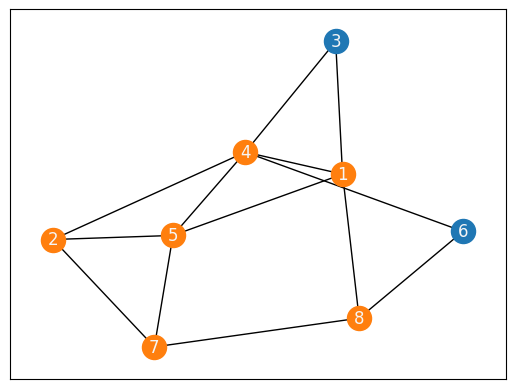

In [9]:
def matching_based_vertex_cover(n, edge_list):
    vertex_cover = [] 
    remaining_edges = list(edge_list)
    while len(remaining_edges) > 0:
        (i,j) = remaining_edges[0]
        vertex_cover.append(i)
        vertex_cover.append(j)
        remaining_edges = [(l,m) for (l,m) in remaining_edges if l != i and l != j and m != i and m != j]
        print(f'adding nodes {i}, {j} to the cover')
    return vertex_cover

edge_list=[ (1,4), (1,5), (2,5), (2,4), (3,4), (4,5),(1,8),(2,7), (7,8),(4,6), (5,7), (6,8), (3,1)]
vcover = matching_based_vertex_cover(8, edge_list)
plot_graph_with_vc(8, edge_list, vcover)